In [5]:
  from google.colab import files
uploaded = files.upload()

Saving titanic-passengers.csv to titanic-passengers.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = pd.read_csv("titanic-passengers.csv", ';')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) #need to fill null numbers in age to do the logistic regression on age vs survived.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [10]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
Survived = {'Yes': 1, 'No': 2}

df.Survived = [Survived[item] for item in df.Survived]
print(Survived)


{'Yes': 1, 'No': 2}


In [12]:
Sex = {'male': 0, 'female': 1}
df.Sex = [Sex[item] for item in df.Sex]
print(Sex)

{'male': 0, 'female': 1}


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,2,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,2,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,2,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,2,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,2,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [16]:
x = df[['Age','Pclass', 'Sex']]
y = df['Survived']

print(x)



           Age  Pclass  Sex
0    28.000000       2    0
1    25.000000       3    0
2    20.000000       3    0
3    29.000000       3    1
4    31.000000       1    0
..         ...     ...  ...
886  14.000000       2    1
887  22.000000       3    0
888  30.000000       3    1
889  29.699118       3    0
890  19.000000       2    1

[891 rows x 3 columns]


In [17]:
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
886    1
887    2
888    2
889    2
890    1
Name: Survived, Length: 891, dtype: int64


In [18]:
df['Age'] = df['Age'].apply(np.int64)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,2,2,"Collander, Mr. Erik Gustaf",0,28,0,0,248740,13.0000,NaN,S
1,76,2,3,"Moen, Mr. Sigurd Hansen",0,25,0,0,348123,7.6500,F G73,S
2,641,2,3,"Jensen, Mr. Hans Peder",0,20,0,0,350050,7.8542,NaN,S
3,568,2,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29,0,4,349909,21.0750,NaN,S
4,672,2,1,"Davidson, Mr. Thornton",0,31,1,0,F.C. 12750,52.0000,B71,S


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


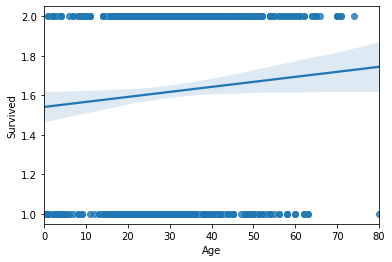

In [21]:
sns.regplot(x='Age', y='Survived', data=df)

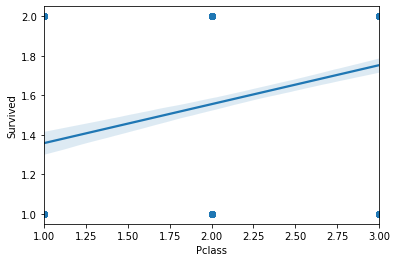

In [22]:
sns.regplot(x='Pclass', y='Survived', data=df)

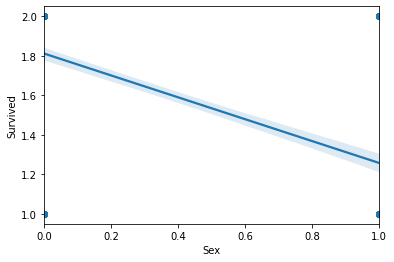

In [23]:
sns.regplot(x='Sex', y='Survived', data=df)

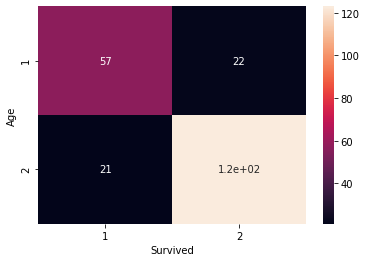

In [24]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Age'], colnames=['Survived'])
sns.heatmap(confusion_matrix, annot=True)

In [1]:
''' What is ROC curve?
It is a graph showing the performance of a classification model at all classification thresholds.
What is AUC curve?
It is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
'''

' What is ROC curve?\nIt is a graph showing the performance of a classification model at all classification thresholds.\nWhat is AUC curve?\nIt is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.\n'

Survived: ROC AUC=0.500
Not Survived: ROC AUC=0.903


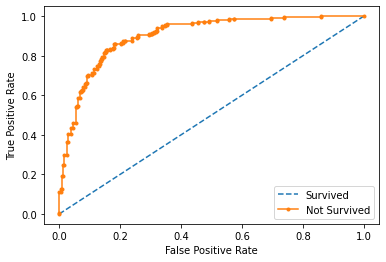

In [29]:

# generate 2 class dataset
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=2)

ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Survived: ROC AUC=%.3f' % (ns_auc))
print('Not Survived: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Survived')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Not Survived')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()